<a href="https://colab.research.google.com/github/santhosh1728/fun_with_nlp/blob/main/spam_textClassification_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = ['which book is this ','this is book and this is math']

In [ ]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [ ]:
count.toarray()  # BoW

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [ ]:
cv.get_feature_names_out()

array(['and', 'book', 'is', 'math', 'this', 'which'], dtype=object)

In [ ]:
bow = pd.DataFrame(count.toarray() , columns = cv.get_feature_names_out())

In [ ]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


# Term Frequency

In [ ]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [ ]:
bow.shape

(2, 6)

In [ ]:
tf = bow.copy()
for index,row in enumerate(tf.iterrows()):
  for col in row[1].index:
    tf.loc[index,col] = tf.loc[index,col]/sum(row[1].values)



In [ ]:
x

['which book is this ', 'this is book and this is math']

In [ ]:
for index, row in enumerate(tf.iterrows()):
  print(row[1])

and      0.00
book     0.25
is       0.25
math     0.00
this     0.25
which    0.25
Name: 0, dtype: float64
and      0.142857
book     0.142857
is       0.285714
math     0.142857
this     0.285714
which    0.000000
Name: 1, dtype: float64


In [ ]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


#Inverse Document Frequency IDF

In [ ]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [ ]:
bb = bow.astype('bool')
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [ ]:
bb['is'].sum()

2

In [ ]:
x


['which book is this ', 'this is book and this is math']

In [ ]:
cols = bb.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [ ]:
nz = []        # -> non zero
for col in cols:
  nz.append(bb['is'].sum())
nz

[2, 2, 2, 2, 2, 2]

In [ ]:
nz = []
for col in cols:
  nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [ ]:
N = 2
idf = []
for index , col in enumerate(cols):
  idf.append(np.log(N + 1)/(nz[index] + 1) + 1)

In [ ]:
idf

[1.549306144334055,
 1.3662040962227033,
 1.3662040962227033,
 1.549306144334055,
 1.3662040962227033,
 1.549306144334055]

In [ ]:
x

['which book is this ', 'this is book and this is math']

#TFIDF  =  TF*IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x

['which book is this ', 'this is book and this is math']

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [ ]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [ ]:
idf

[1.549306144334055,
 1.3662040962227033,
 1.3662040962227033,
 1.549306144334055,
 1.3662040962227033,
 1.549306144334055]

In [ ]:
idf

[1.549306144334055,
 1.3662040962227033,
 1.3662040962227033,
 1.549306144334055,
 1.3662040962227033,
 1.549306144334055]

In [ ]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv", sep = '\t')

In [ ]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.shape

(5572, 4)

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Balance Dataset

In [ ]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [ ]:
df = ham.append(spam,ignore_index=True)

<ipython-input-43-fb0b0aff8b45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = ham.append(spam,ignore_index=True)


In [ ]:
df.sample(5)

,label,message,length,punct
880,spam,PRIVATE! Your 2003 Account Statement for 07808...,149,9
71,ham,Yeah I'll try to scrounge something up,38,1
115,ham,No shoot me. I'm in the docs waiting room. :/,45,5
1428,spam,Jamster! To get your free wallpaper text HEART...,109,7
151,ham,did u get that message,22,0


In [ ]:
df.shape

(1494, 4)

In [ ]:
df['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [ ]:
df.shape

(1494, 4)

In [ ]:
df

,label,message,length,punct
0,ham,Easy ah?sen got selected means its good..,41,3
1,ham,I will spoil you in bed as well :),34,2
2,ham,Sorry me going home first... Daddy come fetch ...,56,6
3,ham,Guess which pub im in? Im as happy as a pig in...,81,2
4,ham,What can i do? Might accidant tookplace betwee...,126,7
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [ ]:
import matplotlib.pyplot as plt


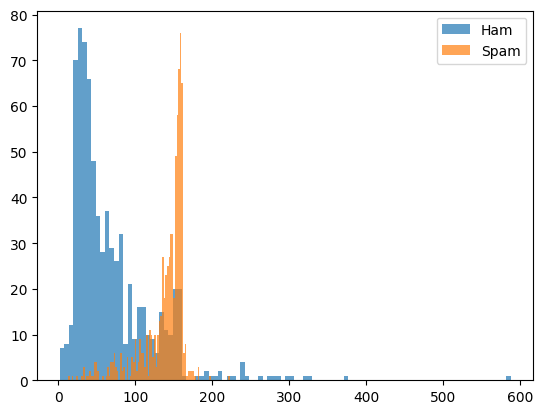

In [ ]:
plt.hist(ham['length'],bins = 100, alpha = 0.7,label = 'Ham')
plt.hist(spam['length'],bins = 100, alpha = 0.7,label = 'Spam')
plt.legend()
plt.show()



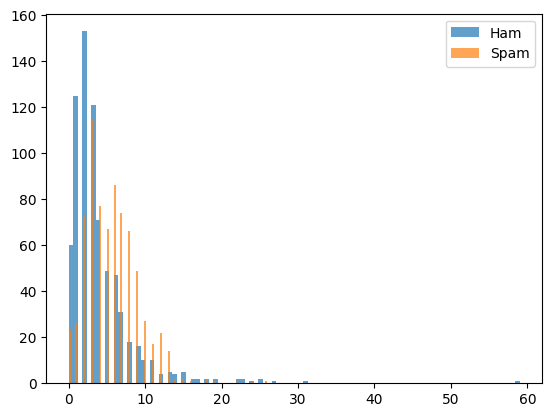

In [ ]:
plt.hist(ham['punct'],bins = 100, alpha = 0.7,label = 'Ham')
plt.hist(spam['punct'],bins = 100, alpha = 0.7,label = 'Spam')
plt.legend()
plt.show()



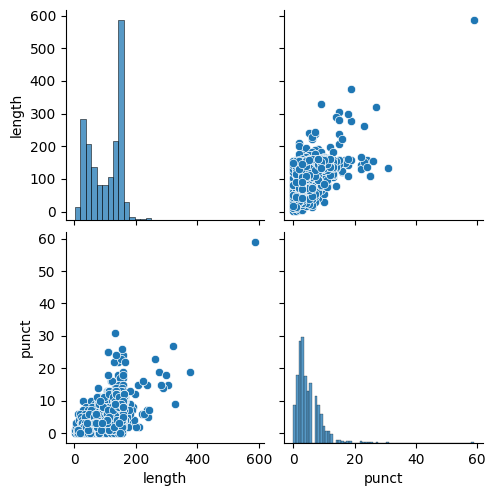

In [ ]:
sns.pairplot(df)

## Data Preparation for Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df.head()

,label,message,length,punct
0,ham,Easy ah?sen got selected means its good..,41,3
1,ham,I will spoil you in bed as well :),34,2
2,ham,Sorry me going home first... Daddy come fetch ...,56,6
3,ham,Guess which pub im in? Im as happy as a pig in...,81,2
4,ham,What can i do? Might accidant tookplace betwee...,126,7


In [ ]:
 tfidf = TfidfVectorizer()
 X = tfidf.fit_transform(df['message'])

In [ ]:
X = X.toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(1494, 4516)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,df['label'],test_size = 0.2,random_state = 0,stratify = df['label'] )

In [ ]:
X_train.shape , X_test.shape

((1195, 4516), (299, 4516))

# Training Text Classifer

In [ ]:
clf = RandomForestClassifier(n_estimators = 100,n_jobs = -1)

 n_jobs -> how many computer code we want to train our random forest algorithm so -1 says that use all code present  in the computer system to train our model

In [ ]:
clf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[147,   3],
       [ 14, 135]])

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.95       150
        spam       0.98      0.91      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



## SVM

In [ ]:
clf =  SVC(gamma = 'auto') #gamma = kernel coefficiant

 n_jobs -> how many computer code we want to train our random forest algorithm so -1 says that use all code present  in the computer system to train our model

In [ ]:
clf = SVC(C=1000,gamma = 'auto')

In [ ]:
clf.fit(X_train,Y_train)

SVC(C=1000, gamma='auto')

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[148,   2],
       [ 16, 133]])

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       150
        spam       0.99      0.89      0.94       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



In [ ]:
clf

SVC(C=1000, gamma='auto')

In [ ]:
def predict(X):
  x=tfidf.transform([X])
  x=x.toarray()
  pred = clf.predict(x)
  return pred

In [ ]:
predict("hey, whatsapp")

array(['ham'], dtype=object)

In [ ]:
predict("you have got free tickets to the usa this summer")

array(['spam'], dtype=object)

In [ ]:
predict("amo ra babu..")

array(['ham'], dtype=object)

In [ ]:
predict("fuck")

array(['ham'], dtype=object)

In [ ]:
predict("prasad will provide you all kind of knowledge for usa trip")

array(['ham'], dtype=object)

In [ ]:
predict("i will provide any information")

array(['ham'], dtype=object)

In [ ]:
df['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64